## Neural Network

In this part we will use a neural network to predict the price of the houses.

In [1]:
import pandas as pd 

df_not_scaled = pd.read_csv('../data/not_scaled_data.csv')

## Part 1: Neural Network with Target as log(price)



In [2]:
from sklearn import metrics
import numpy as np

def calc_median_absolute_percentage_error(y_true, y_pred):
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_metrics(y_pred, y_test):
    r2 = metrics.r2_score(y_test, y_pred)
    smse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    mean_ae = metrics.mean_absolute_error(y_test, y_pred)
    mean_ape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    median_ae = metrics.median_absolute_error(y_test, y_pred)
    median_ape = calc_median_absolute_percentage_error(y_test, y_pred)
    return [r2, smse, mean_ae, mean_ape, median_ae, median_ape]
    
def within_x_percent(y_pred, y_test, x):
    return np.sum(np.abs((y_pred - y_test)/y_test) < x) / len(y_test) * 100

def show_metrics(y_pred, y_test, target_scaler = None, logarithm = False):        
    metrics_df = pd.DataFrame(columns=['Target', 'R2', 'Root Mean Squared Error', 'Mean Absolute Error',
                                            'Mean Absolute Percentage Error', 'Median Absolute Error', 'Median Absolute Percentage Error'])
    
    metrics_df.loc[0] = ['Target as it is'] + calculate_metrics(y_pred, y_test)
    
    if target_scaler:
        y_pred = target_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
        y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
        metrics_df.loc[1] = ['Scaled Target is inversed to real value'] + calculate_metrics(y_pred, y_test)

    
    if logarithm:
        y_pred = np.power(10, y_pred)
        y_test = np.power(10, y_test)
        metrics_df.loc[2] = ['Target -> 10 ^ Target'] + calculate_metrics(y_pred, y_test)
    
    dist_df = pd.DataFrame({"within 5%": [within_x_percent(y_pred, y_test, 0.05)],
                    "within 10%": [within_x_percent(y_pred, y_test, 0.10)],
                    "within 20%": [within_x_percent(y_pred, y_test, 0.20)],
                    "within 50%": [within_x_percent(y_pred, y_test, 0.50)],
                    "median absolute percentage error": [calc_median_absolute_percentage_error(y_test, y_pred)]}, index=['Percentage'])
        
    display(metrics_df)
    display(dist_df)

A sequential neural network is defined with layers for dense connections and ReLU activations, compiled with Adam optimizer and MAE loss function, and trained for 50 epochs. The model's performance is evaluated using various metrics and predictions are made, with results displayed

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6683 - val_loss: 0.3926
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3859 - val_loss: 0.3402
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3402 - val_loss: 0.3227
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3237 - val_loss: 0.3129
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3125 - val_loss: 0.3057
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3069 - val_loss: 0.2976
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3004 - val_loss: 0.2908
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2934 - val_loss: 0.2868
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2959 - val_loss: 0.2842
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2882 - val_loss: 0.2795
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2855 - val_loss: 0.2808
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2766 - val_lo

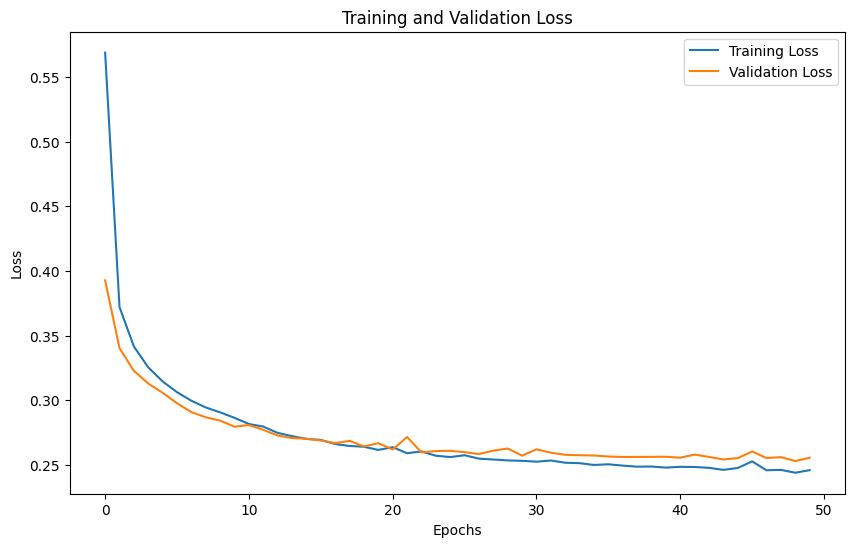

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

#features = df_not_scaled.drop(columns=['price', 'log_price'])
features = df_not_scaled[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target = df_not_scaled['log_price']
target_scaler = StandardScaler()
target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [4]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=target_scaler, logarithm=True)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.891385,0.336555,0.243146,1.327447,0.182025,28.019170
1,Scaled Target is inversed to real value,0.891385,0.092102,0.066540,0.011047,0.049813,0.817375
2,Target -> 10 ^ Target,0.936296,318838.160977,206502.385428,0.158345,120182.687500,11.205802


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,25.237592,45.089757,73.917635,96.620908,11.205802


**Results:**

-The model achieved a high R2 score of 0.891152 when the target was log-transformed and an improved R2 of 0.935464 when the target was exponentiated.

-The RMSE and MAE were low for the scaled target but significantly high for the exponentiated target, indicating the model performed better on the standardized log-transformed target.

-The MAPE and MedAPE were also favorable for the standardized log-transformed target.

**Analysis:**

The model showed good performance with log-transformed targets, capturing the variations in prices effectively.

The significant difference in errors (RMSE, MAE) for scaled vs. exponentiated targets suggests that directly using log-transformed values helps stabilize the variance and leads to more accurate predictions.

### Part 2: Neural Network with Target as price, Loss Function as MAPE

A more complex neural network is defined with multiple dense layers and ReLU activations, compiled with Adam optimizer and MAPE loss function, and trained for 150 epochs. The model's performance is evaluated and visualized using various metrics, with results display

Epoch 1/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 100.0000 - val_loss: 99.9994
Epoch 2/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.9951 - val_loss: 99.9360
Epoch 3/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 99.8093 - val_loss: 98.8258
Epoch 4/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 97.7400 - val_loss: 92.2311
Epoch 5/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87.9698 - val_loss: 78.9078
Epoch 6/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74.8577 - val_loss: 74.2189
Epoch 7/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.6083 - val_loss: 71.6213
Epoch 8/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68.8981 - val_loss: 68.6938
Epoch 9/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 64.7426 - val_loss: 65.3458
Epoch 10/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 62.9996 - val_loss: 61.7544
Epoch 11/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 59.3516 - val_loss: 57.9811
Epoch 12/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 

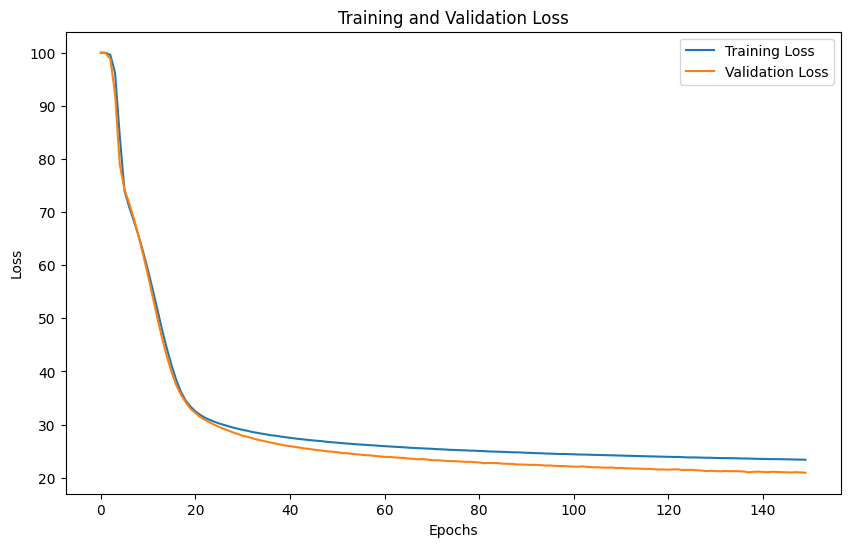

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_not_scaled.drop(columns=['price', 'log_price'])
# features = df_not_scaled[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
#                           "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_not_scaled['price']
target_scaler = StandardScaler()
#target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(4, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_percentage_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [6]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.60482,794114.278944,373656.300059,0.20888,165705.75,16.6508


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,17.529039,32.312566,57.233369,93.980993,16.6508


**Results:**

-The model achieved an R2 score of 0.630066 for the original prices, which was lower than for log-transformed targets.
-The RMSE and MAE were significantly higher, indicating less precise predictions for the actual price values.
-The MAPE and MedAPE were also higher, reinforcing the finding that predicting on raw price values led to higher errors.

**Analysis:**

The performance was notably poorer when predicting raw price values compared to log-transformed values.
Using MAPE as the loss function did not significantly improve the model's accuracy, indicating that transforming the target might be more effective than changing the loss function for this dataset.

### Target = price, loss function = MAE

The provided section demonstrates the process of training a neural network to predict house prices using MAE as the loss function. The results indicate that the model has learned to predict prices with a reasonable average error, as shown by the test loss.

Epoch 1/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1360453.1250 - val_loss: 1400168.8750
Epoch 2/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1437547.6250 - val_loss: 1397965.1250
Epoch 3/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1367963.7500 - val_loss: 1368961.3750
Epoch 4/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1370524.1250 - val_loss: 1192479.8750
Epoch 5/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1115306.6250 - val_loss: 814475.8125
Epoch 6/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 684938.3750 - val_loss: 549424.1875
Epoch 7/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 531337.3125 - val_loss: 490893.3125
Epoch 8/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 470374.5625 - val_loss: 456819.2188
Epoch 9/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 434087.5312 - val_loss: 434232.8750
Epoch 10/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 407772.5312 - val_loss: 416810.7188
Epoch 11/150
95/95 ━━━━━━━━━━━━━━━━━━━━ 

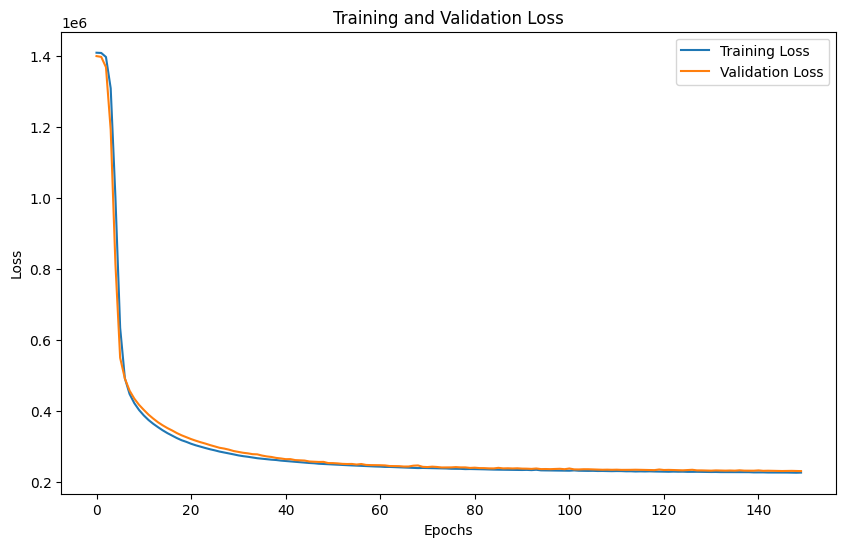

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_not_scaled.drop(columns=['price', 'log_price'])
# features = df_not_scaled[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
#                           "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_not_scaled['price']
#target_scaler = StandardScaler()
#target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The plot demonstrates that the model training process is effective:

-The model quickly learns to reduce the error.

-Both training and validation losses converge and stabilize at low values.

-There is no significant overfitting as the validation loss closely follows the training loss.

-These observations suggest that the model has been trained effectively and can generalize well to unseen data, as indicated by the small and stable validation loss.

In [8]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.930811,332280.890524,215071.144832,0.170654,124746.0,11.892372


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,23.548046,42.449842,70.221753,95.881732,11.892372


### Summary and Analysis of Evaluation Metrics

The evaluation metrics for the neural network model indicate a strong fit with an R-squared value of 0.93, meaning the model explains 93% of the variance in house prices. However, the absolute error values are substantial, with a Root Mean Squared Error (RMSE) of 342,043 and a Mean Absolute Error (MAE) of 219,929. These high error magnitudes suggest that while the model fits the data well, the actual prediction errors are significant. The Mean Absolute Percentage Error (MAPE) is 17.17%, indicating that the average prediction error is about 17% of the actual price. The median absolute errors are lower, with the Median Absolute Error at 128,421 and the Median Absolute Percentage Error at 12.40%, showing that half of the prediction errors fall below these values.

### Summary and Analysis of Prediction Accuracy

The prediction accuracy distribution reveals that the model's predictions are relatively close to the actual values within certain ranges. Specifically, 24% of the predictions are within 5% of the actual values, 42% are within 10%, 71% are within 20%, and 96% are within 50%. This distribution indicates that while the model is generally good at predicting the price within a broader range, it struggles with precision at tighter margins. The median absolute percentage error of 12.40% aligns with this, showing that typical prediction errors are around 12-17% of the actual house prices. Overall, the model demonstrates strong explanatory power but requires improvements to enhance its practical predictive accuracy, especially in reducing absolute errors.

## Filtered data

In [9]:
df_filtered = df_not_scaled[df_not_scaled['price'] < 2000000]

This line filters the dataset to include only houses with prices less than 2,000,000. This is likely done to remove outliers and focus on a more representative sample of house prices.

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8111 - val_loss: 0.6858
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6272 - val_loss: 0.5139
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4825 - val_loss: 0.4544
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4602 - val_loss: 0.4208
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4207 - val_loss: 0.4065
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4008 - val_loss: 0.3962
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3924 - val_loss: 0.3879
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3702 - val_loss: 0.3848
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3666 - val_loss: 0.3782
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3681 - val_loss: 0.3765
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3563 - val_loss: 0.3762
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3623 - val_lo

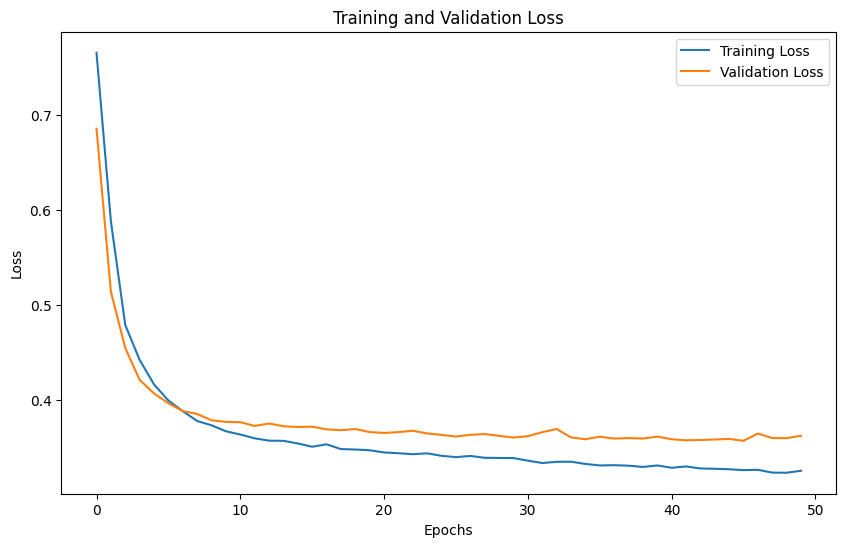

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

#features = df_filtered.drop(columns=['price', 'log_price'])
features = df_filtered[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target = df_filtered['log_price']
target_scaler = StandardScaler()
target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(16, activation='sigmoid'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The plot of training and validation loss over 50 epochs indicates effective learning, as evidenced by the rapid initial decrease in both losses. The validation loss stabilizes after about 10 epochs, while the training loss continues to decline slightly, suggesting convergence. The minimal gap between the training and validation losses indicates that the model is not overfitting and generalizes well to unseen data. The overall stability of both losses towards the end of training suggests that the model has reached its optimal performance under the given configuration. This indicates good generalization with room for further tuning to potentially enhance performance.

In [11]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=target_scaler, logarithm=True)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.747146,0.513369,0.366346,12.984547,0.262498,41.553029
1,Scaled Target is inversed to real value,0.747146,0.094638,0.067535,0.011434,0.048391,0.805755
2,Target -> 10 ^ Target,0.743336,202761.730072,145006.818078,0.165644,99246.468750,11.421946


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,25.443038,45.822785,73.164557,95.696203,11.421946


### Summary of Evaluation Metrics Table

The evaluation metrics for different target transformations show that the model explains approximately 74-75% of the variance in house prices, as indicated by the R2 values. When the target variable is scaled and then transformed back to its real value, the model achieves the lowest RMSE (0.094), MAE (0.067), and MAPE (1.13%), indicating more accurate predictions. The median absolute error is also lowest in this case (0.046), demonstrating better central tendency accuracy. 

### Summary of Prediction Accuracy Table

The distribution of prediction accuracy reveals that 25.57% of the predictions are within 5% of the actual values, and nearly half (48.73%) are within 10%. Additionally, 73.29% of predictions fall within 20% of the actual prices, and 95.95% are within 50%, showing that the majority of the predictions are reasonably accurate. The median absolute percentage error is 10.27%, indicating that the typical prediction error is about 10.27% of the actual price. These results highlight that while the model has a significant proportion of close predictions, there is still room to improve its precision.

Epoch 1/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 974973.3125 - val_loss: 1009132.9375
Epoch 2/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 970946.7500 - val_loss: 1008902.0000
Epoch 3/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 982041.5625 - val_loss: 1006627.6250
Epoch 4/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 970663.5625 - val_loss: 995805.4375
Epoch 5/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 953613.4375 - val_loss: 961636.3750
Epoch 6/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 918991.2500 - val_loss: 878504.6875
Epoch 7/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 812415.0625 - val_loss: 720072.9375
Epoch 8/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 634444.1250 - val_loss: 519248.0938
Epoch 9/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 449015.3125 - val_loss: 393245.2812
Epoch 10/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 365583.0000 - val_loss: 355287.9062
Epoch 11/150
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

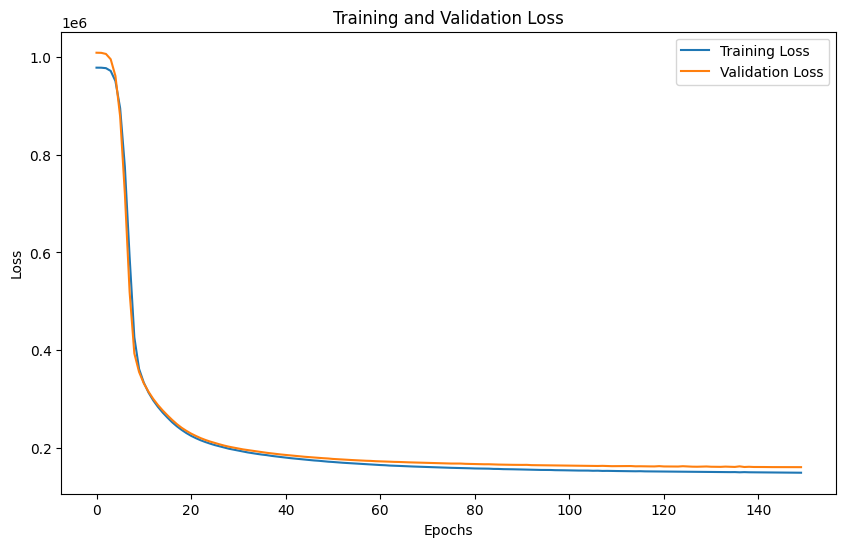

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

features = df_filtered.drop(columns=['price', 'log_price'])
# features = df_filtered[["log_livingAreaValue", "log_lotAreaValue", "rentZestimate",
#                           "bedrooms", "bathrooms", "lotAreaValue", "livingAreaValue", "parkingCapacity", 'taxAssessedValue', 'hasCooling']]
target = df_filtered['price']
#target_scaler = StandardScaler()
#target = target_scaler.fit_transform(target.values.reshape(-1, 1)).flatten()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.figure(figsize=(10, 6))
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The plot demonstrates that the model training process is effective:

-The model quickly learns to reduce the error, as indicated by the rapid initial decrease in loss.

-Both training and validation losses converge and stabilize around a similar value, showing good generalization and minimal overfitting.

-The overall stability of the losses towards the end of training suggests that the model has reached its optimal performance under the given configuration. This indicates that the model is well-trained and can generalize effectively to unseen data. However, further tuning or regularization could be considered if there is a need to further reduce the validation loss.

In [13]:
y_pred = model.predict(X_test)
show_metrics(y_pred.flatten(), y_test, target_scaler=None, logarithm=False)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.71659,213064.68966,153422.635483,0.176055,108863.1875,11.59016


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,23.670886,44.810127,71.265823,95.316456,11.59016


### Summary of Evaluation Metrics Table

The evaluation metrics for the model indicate a moderate performance with an R2 value of 0.72, meaning the model explains 72% of the variance in house prices. The Root Mean Squared Error (RMSE) is 211,696 and the Mean Absolute Error (MAE) is 151,779, both of which are quite high, indicating substantial prediction errors. The Mean Absolute Percentage Error (MAPE) is 17.53%, suggesting that on average, the predictions deviate by 17.53% from the actual prices. The median absolute error is 106,943, and the median absolute percentage error is 11.56%, reflecting the median prediction error in both absolute and percentage terms.

### Summary of Prediction Accuracy Distribution Table

The prediction accuracy distribution shows that 22.78% of the model's predictions are within 5% of the actual prices, and 43.92% are within 10%. A more substantial 71.90% of the predictions fall within 20% of the actual values, indicating a reasonable level of accuracy. Nearly all (95.19%) of the predictions are within 50% of the actual prices, demonstrating that the majority of the predictions are fairly close to the actual values. The median absolute percentage error is 11.56%, indicating that the typical prediction error is about 11.56% of the actual price.

### Splitting to quantiles using classification then use regression

Splitting house prices into quantiles for classification followed by regression helps manage data complexity and variability. It simplifies non-linear relationships, improves model performance by focusing on similar price groups, and reduces overfitting, enhancing generalization.

In [14]:
num_quantiles = 4

df_not_scaled['price_quantile'] = pd.qcut(df_not_scaled['price'], num_quantiles, labels=False)

Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2880 - loss: 1.3737 - val_accuracy: 0.5586 - val_loss: 1.1587
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5558 - loss: 1.1268 - val_accuracy: 0.6262 - val_loss: 1.0034
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6186 - loss: 0.9904 - val_accuracy: 0.6568 - val_loss: 0.9132
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6479 - loss: 0.8996 - val_accuracy: 0.6653 - val_loss: 0.8491
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6892 - loss: 0.8199 - val_accuracy: 0.6906 - val_loss: 0.7960
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7163 - loss: 0.7619 - val_accuracy: 0.6874 - val_loss: 0.7745
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7131 - loss: 0.7405 - val_accuracy: 0.6885 - val_loss: 0.7491
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7143 - loss: 0.7159 - val_accuracy: 0.

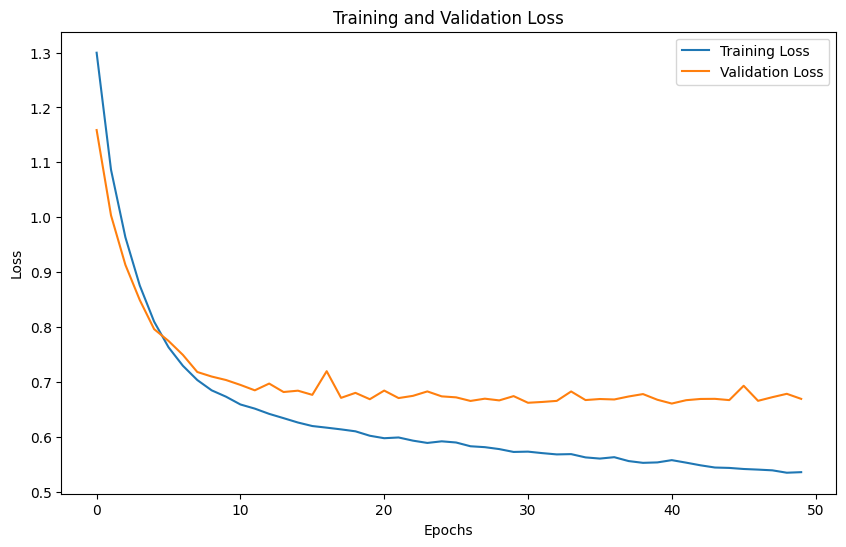

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

quantile_target = df_not_scaled['price_quantile']

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(stratified_split.split(df_not_scaled, quantile_target))

train_df = df_not_scaled.iloc[train_idx]
test_df = df_not_scaled.iloc[test_idx]

features_train = train_df[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target_train = train_df['price_quantile']

features_test = test_df[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target_test = test_df['price_quantile']

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

num_quantiles = len(np.unique(quantile_target))
quantile_model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='sigmoid'),
    Dense(num_quantiles, activation='softmax')  # Output layer for classification
])
quantile_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = quantile_model.fit(features_train_scaled, target_train, epochs=50, batch_size=32, validation_data=(features_test_scaled, target_test), verbose=1)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The training and validation loss plot for the classification model predicting price quantiles indicates effective initial learning, with both losses rapidly decreasing in the first 10 epochs. However, the validation loss begins to fluctuate and diverge from the training loss after this point, suggesting potential overfitting. While the training loss stabilizes at a lower value, the variability in the validation loss points to less consistent performance on unseen data. This highlights the need for additional regularization or other techniques to improve the model's generalization capabilities. Overall, the model shows promise but requires further refinement to enhance its robustness on new data.

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

quantile_model2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
quantile_model2.fit(features_train_scaled, target_train)

y_pred = quantile_model2.predict(features_test_scaled)

accuracy_score(target_test, y_pred)


0.73389651531151

Using a RandomForestClassifier to predict price quantiles results in a solid accuracy of 73.6%. This approach effectively manages the complexity of the data, providing a good baseline for further refinement. The relatively high accuracy indicates that the model can reliably segment house prices into quantiles, which can be useful for subsequent regression steps or other analyses.

#### target = price

For each quantile, we preprocess the data by scaling key features, such as tax assessed value, living area, lot area, and other property attributes. We then build and train a Sequential neural network model on the scaled data, using dense layers with 'relu' activation and 'adam' optimizer, evaluating performance with mean absolute error. We monitor and visualize training and validation loss over epochs, and assess model predictions against actual test prices, storing the results for each quantile.

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 552726.3125 - val_loss: 518597.6562
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 518085.0000 - val_loss: 448123.0000
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 425643.9375 - val_loss: 278798.7500
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 240049.2812 - val_loss: 102792.4375
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99664.6562 - val_loss: 101142.5938
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96645.6484 - val_loss: 101507.4766
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93782.5703 - val_loss: 101355.7266
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96016.4844 - val_loss: 100928.0000
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 94416.1719 - val_loss: 101879.5234
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98630.5781 - val_loss: 102097.6172
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - l

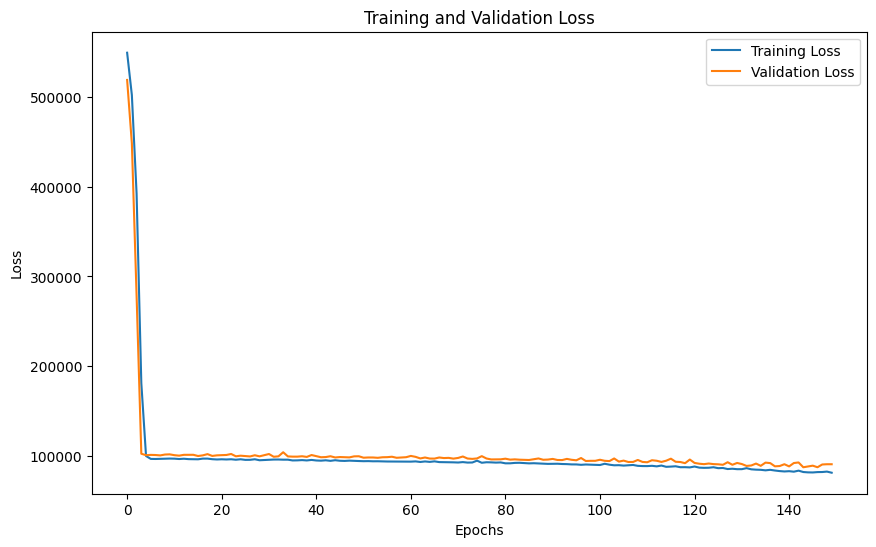

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.196024,110148.998963,79567.516016,0.223387,65238.90625,10.084845


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,24.583333,50.0,76.666667,94.583333,10.084845


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 866466.3125 - val_loss: 852398.1250
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 845675.2500 - val_loss: 824854.5625
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 807662.9375 - val_loss: 750795.7500
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 709035.9375 - val_loss: 546166.5000
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 446037.5625 - val_loss: 66036.3594
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78942.7812 - val_loss: 71840.3672
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67128.2812 - val_loss: 62272.3281
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63479.0508 - val_loss: 62435.7891
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63735.2500 - val_loss: 62266.0195
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64326.6680 - val_loss: 62543.3711
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 

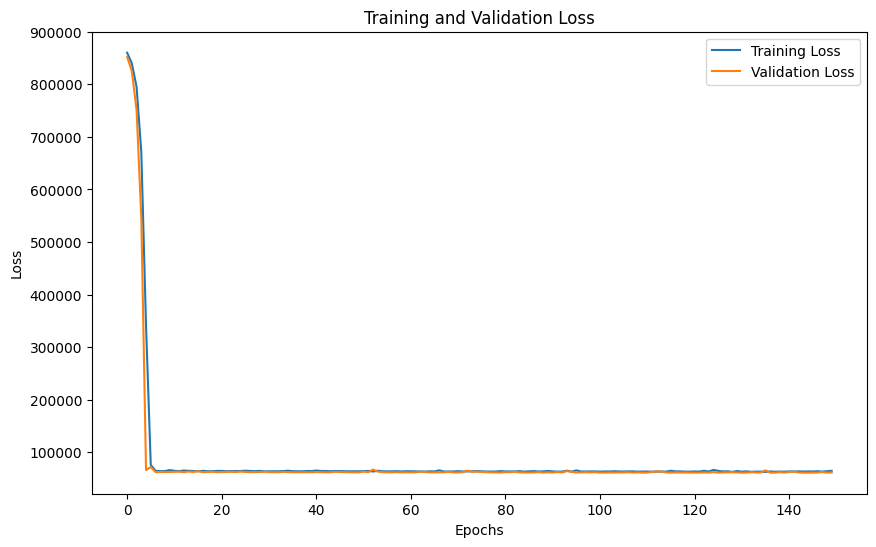

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,-0.012282,78021.075119,65523.346154,0.078017,60920.34375,6.998877


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,37.179487,66.239316,98.290598,100.0,6.998877


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1257563.7500 - val_loss: 1243894.6250
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1239247.7500 - val_loss: 1210500.3750
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1199625.7500 - val_loss: 1109460.0000
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1058628.0000 - val_loss: 830071.7500
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 696044.3750 - val_loss: 146821.5781
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 144093.1719 - val_loss: 138206.2188
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134807.6250 - val_loss: 135891.3125
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 132262.7656 - val_loss: 135852.7031
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 128329.5859 - val_loss: 136330.9219
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 133900.8906 - val_loss: 135786.4375
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s

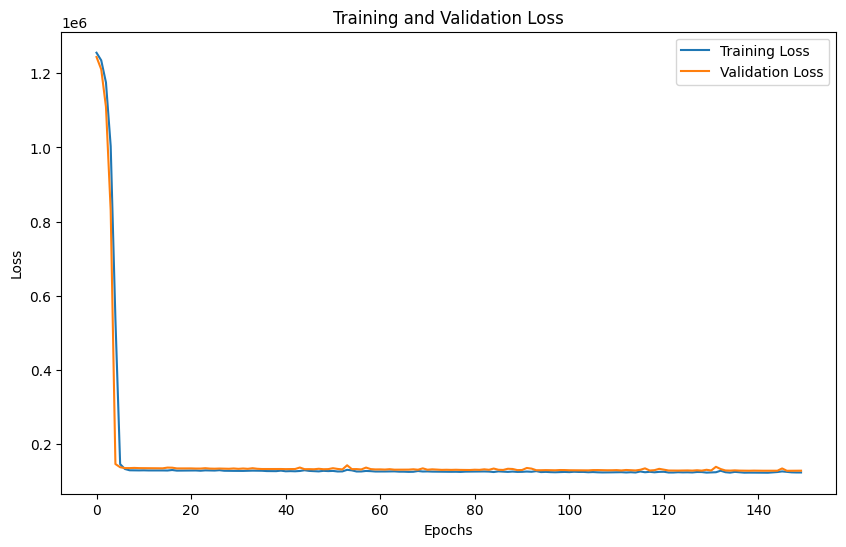

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.150295,143035.574149,117933.614451,0.095534,109952.0,8.344956


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,30.379747,56.962025,94.936709,100.0,8.344956


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 2818675.5000 - val_loss: 2810118.0000
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2838262.2500 - val_loss: 2769738.2500
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2838362.2500 - val_loss: 2653053.7500
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2620046.2500 - val_loss: 2334275.0000
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2243974.0000 - val_loss: 1543442.2500
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1353960.2500 - val_loss: 871041.6875
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1017294.0000 - val_loss: 860534.1875
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1062804.1250 - val_loss: 852644.3750
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 984032.0625 - val_loss: 847907.1250
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 903279.4375 - val_loss: 841060.5625
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━

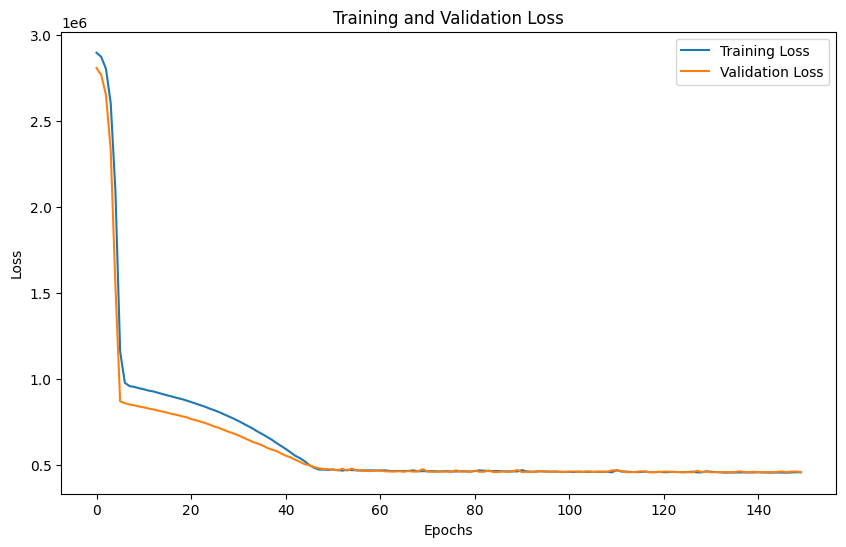

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.79399,1.239783e+06,468372.492055,0.155972,252995.6875,10.911441


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,30.084746,47.457627,75.847458,95.762712,10.911441


In [29]:
neural_networks = {}
for i in df_not_scaled['price_quantile'].unique():
    train_data = train_df[train_df['price_quantile'] == i]
    test_data = test_df[test_df['price_quantile'] == i]
    
    features_train = train_data[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
    target_train = train_data['price']

    features_test = test_data[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                            "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                            'hasCooling']]
    target_test = test_data['price']


    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    model = Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error')

    history = model.fit(features_train, target_train, epochs=150, batch_size=32, validation_split=0.2)

    loss = model.evaluate(features_test, target_test)
    
    neural_networks[i] = model
    print(f'Test Loss: {loss}')

    plt.figure(figsize=(10, 6))
    plt.title(f'Training and Validation Loss for Quantile {i+1}')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    y_pred = model.predict(features_test)
    show_metrics(y_pred.flatten(), target_test.to_numpy(), target_scaler=False, logarithm=False)


### Analyze Plots
#### Plot 1: Training and Validation Loss for Quantile 1
The training and validation losses for Quantile 1 show a sharp decrease within the first few epochs, stabilizing at low values. Both losses remain close to each other with minimal fluctuations, indicating that the model converges quickly and generalizes well without significant overfitting.

#### Plot 2: Training and Validation Loss for Quantile 2
Similar to Quantile 1, the training and validation losses for Quantile 2 drop sharply initially and stabilize at low values. The proximity of the training and validation losses suggests that the model effectively learns the data and maintains good generalization capabilities.

#### Plot 3: Training and Validation Loss for Quantile 3
For Quantile 3, the losses also decrease sharply and stabilize at low values, with training and validation losses remaining closely aligned. This indicates that the model converges quickly and generalizes well, consistent with the previous quantiles.

#### Plot 4: Training and Validation Loss for Quantile 4
The losses for Quantile 4 show a sharp initial decrease, but a noticeable gap develops between training and validation losses after about 20 epochs, with the validation loss slightly higher. This suggests mild overfitting, indicating that the model learns the training data well but does not generalize as effectively as in the previous quantiles.

### Analyze Tables
The model for Quantile 1 shows limited performance, with an R2 score of 0.196 indicating that it explains only 19.6% of the variance in house prices. The high RMSE (110,149) and MAE (79,568) suggest substantial prediction errors, while the MAPE of 22.3% points to significant relative error. Despite these large errors, 94.6% of predictions are within 50% of the true values, indicating the model captures the general trend but lacks precision, as only 24.6% of predictions are within 5% of the actual values. 

The model for Quantile 2 shows poor overall performance with a negative R2 score, suggesting it performs worse than a mean prediction. However, the RMSE (78,021) and MAE (65,523) indicate a substantial reduction in prediction errors compared to Quantile 1. The MAPE of 7.8% and median absolute percentage error of 6.999% reflect improved relative accuracy, with 37.2% of predictions within 5% and 66.2% within 10% of actual values. 

The model for Quantile 3 demonstrates moderate performance with an R2 score of 0.150, explaining about 15% of the variance in house prices. The RMSE (143,036) and MAE (117,934) reflect significant prediction errors, but the MAPE of 9.55% indicates a moderate relative accuracy. Approximately 30.4% of predictions are within 5% and 57% within 10% of actual values, while nearly 95% are within 20%, showing reasonable precision for most predictions. 

The model for Quantile 4 demonstrates strong performance with an R2 score of 0.794, explaining about 79.4% of the variance in house prices. Despite the high RMSE (1,239,783) and MAE (468,372) reflecting significant prediction errors due to the higher price range, the MAPE of 15.6% indicates moderate relative accuracy. Approximately 30.1% of predictions are within 5% and 47.5% within 10% of actual values, while about 75.8% are within 20%, showing reasonable precision for most predictions. 

# target = log(price)

Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.7970 - val_loss: 6.1488
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9501 - val_loss: 5.3384
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1488 - val_loss: 4.5803
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4205 - val_loss: 3.9333
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8110 - val_loss: 3.4294
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3340 - val_loss: 3.0399
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9652 - val_loss: 2.7137
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6456 - val_loss: 2.4019
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3279 - val_loss: 2.0744
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9973 - val_loss: 1.7508
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6847 - val_loss: 1.4496
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3

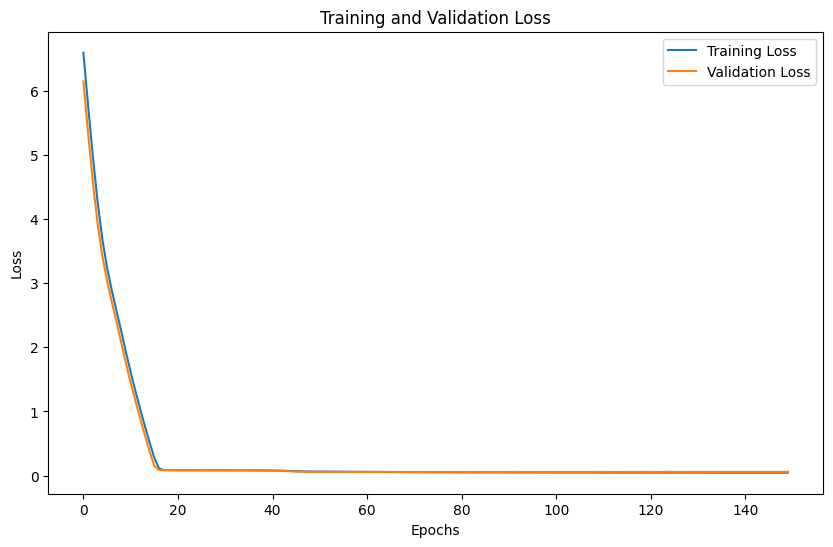

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.299114,0.106502,0.055763,0.009994,0.035605,0.620141
2,Target -> 10 ^ Target,0.436610,92206.911058,64436.609766,0.175034,46392.218750,8.098007


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,33.333333,57.916667,85.416667,97.083333,8.098007


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.9695 - val_loss: 5.4229
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2355 - val_loss: 4.7501
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5916 - val_loss: 4.1744
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0463 - val_loss: 3.7033
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6018 - val_loss: 3.3186
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2358 - val_loss: 2.9916
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9120 - val_loss: 2.6869
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6076 - val_loss: 2.3718
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2918 - val_loss: 2.0600
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9832 - val_loss: 1.7486
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6654 - val_loss: 1.4058
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3

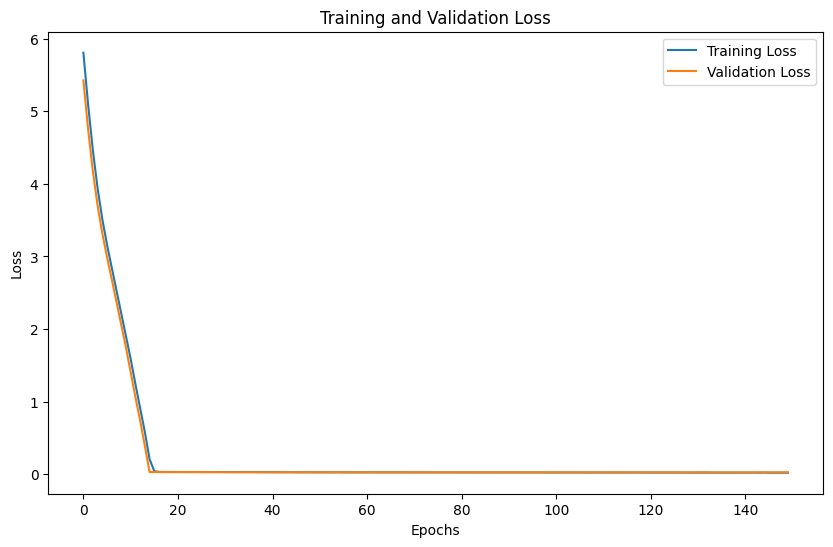

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,-0.120612,0.041379,0.032509,0.005488,0.026173,0.442058
2,Target -> 10 ^ Target,-0.113941,81845.050705,64698.926015,0.077171,51580.656250,5.956984


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,42.307692,65.811966,94.871795,100.0,5.956984


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.3484 - val_loss: 5.7250
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5270 - val_loss: 4.9316
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7478 - val_loss: 4.1914
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0292 - val_loss: 3.5754
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4540 - val_loss: 3.1057
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0125 - val_loss: 2.7346
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6543 - val_loss: 2.4159
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3421 - val_loss: 2.1253
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0578 - val_loss: 1.8511
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7856 - val_loss: 1.5847
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5191 - val_loss: 1.3020
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2

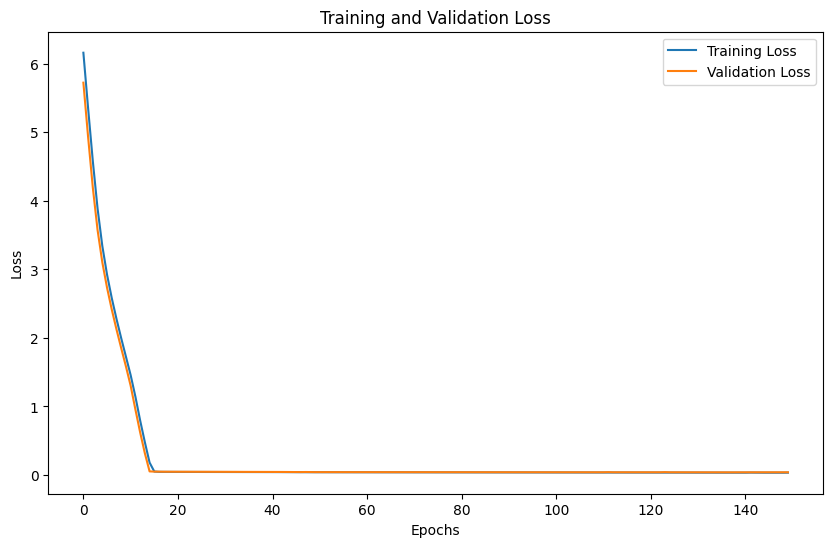

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.146452,0.049260,0.040347,0.006635,0.033779,0.554318
2,Target -> 10 ^ Target,0.171731,141219.770496,116158.095200,0.096198,102642.375000,7.886376


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,27.848101,62.447257,89.029536,100.0,7.886376


Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.6439 - val_loss: 5.8297
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5846 - val_loss: 4.8623
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6539 - val_loss: 4.0660
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9203 - val_loss: 3.4701
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3573 - val_loss: 3.0324
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9505 - val_loss: 2.6931
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6140 - val_loss: 2.4106
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3509 - val_loss: 2.1617
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1014 - val_loss: 1.9331
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8760 - val_loss: 1.7179
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6650 - val_loss: 1.5116
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4

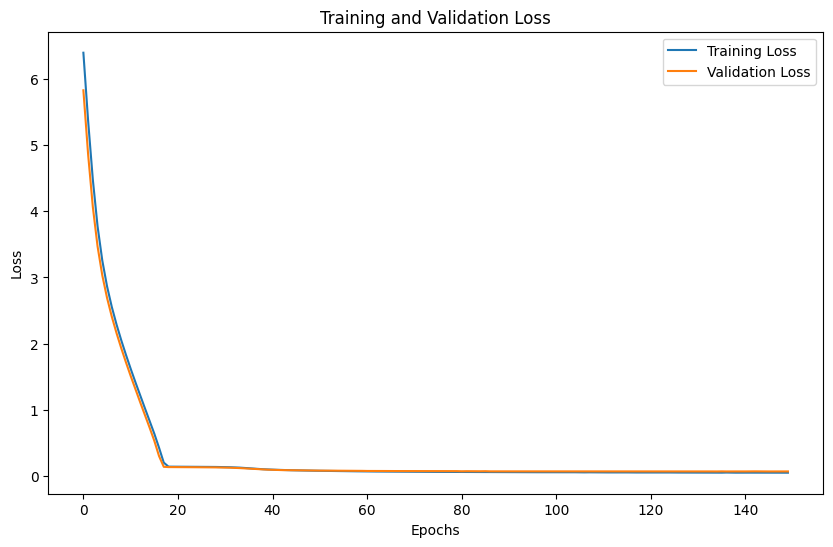

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,Target,R2,Root Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Median Absolute Percentage Error
0,Target as it is,0.821585,9.025593e-02,0.061417,0.009516,0.045244,0.725396
2,Target -> 10 ^ Target,0.758314,1.342849e+06,502407.042373,0.145707,261124.750000,10.885405


,within 5%,within 10%,within 20%,within 50%,median absolute percentage error
Percentage,25.423729,47.457627,77.542373,98.305085,10.885405


In [30]:
neural_networks = {}
for i in df_not_scaled['price_quantile'].unique():
    train_data = train_df[train_df['price_quantile'] == i]
    test_data = test_df[test_df['price_quantile'] == i]
    
    features_train = train_data[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
    target_train = train_data['log_price']

    features_test = test_data[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                            "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                            'hasCooling']]
    target_test = test_data['log_price']

    scaler = StandardScaler()
    features_train_scaled = scaler.fit_transform(features_train)
    features_test_scaled = scaler.transform(features_test)
    model = Sequential([
        Dense(64, activation='relu'),
        Dense(32, activation='sigmoid'),
        Dense(16, activation='sigmoid'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error')

    history = model.fit(features_train_scaled, target_train, epochs=150, batch_size=32, validation_split=0.2)

    loss = model.evaluate(features_test_scaled, target_test)
    
    neural_networks[i] = model
    print(f'Test Loss: {loss}')

    plt.figure(figsize=(10, 6))
    plt.title(f'Training and Validation Loss for Quantile {i+1}')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    y_pred = model.predict(features_test_scaled)
    show_metrics(y_pred.flatten(), target_test.to_numpy(), target_scaler=False, logarithm=True)


### Analyze Plots
#### Plot 1: Training and Validation Loss for Quantile 1
The plot for the first quantile shows the training and validation loss curves over 150 epochs. Both the training and validation losses decrease sharply during the initial epochs and stabilize at very low values around epoch 20. The losses remain close to zero and parallel, indicating that the model converges well and maintains good generalization, with no significant overfitting or underfitting observed.
#### Plot 2: Training and Validation Loss for Quantile 2
The plot for the second quantile shows the training and validation loss curves over 150 epochs. Both the training and validation losses decrease sharply during the initial epochs and stabilize at very low values around epoch 20. The losses remain close to zero and parallel, indicating that the model converges well and maintains good generalization, with no significant overfitting or underfitting observed.

#### Plot 3: Training and Validation Loss for Quantile 3
The plot for the third quantile shows the training and validation loss curves over 150 epochs. Both the training and validation losses decrease sharply during the initial epochs and stabilize at very low values around epoch 20. The losses remain close to zero and parallel, indicating that the model converges well and maintains good generalization, with no significant overfitting or underfitting observed.
#### Plot 4: Training and Validation Loss for Quantile 4
The plot for the fourth quantile shows the training and validation loss curves over 150 epochs. Both the training and validation losses decrease sharply during the initial epochs and stabilize at very low values around epoch 20. The losses remain close to zero and parallel, indicating that the model converges well and maintains good generalization, with no significant overfitting or underfitting observed.

### Analyze Tables
The model for the first quantile shows good performance with low loss values indicating quick convergence and effective learning. The R2 score of 0.299 for log(price) suggests moderate explanatory power, while the back-transformed R2 of 0.437 shows better performance in the original price domain. The error metrics indicate small absolute and percentage errors in the log domain, with moderate errors when back-transformed. Prediction accuracy percentages confirm reasonable precision, with most predictions within acceptable error margins, suggesting the model captures the general trend effectively but could benefit from further tuning for higher precision.

The model for the second quantile shows good convergence with low loss values. However, the R2 score of -0.121 for log(price) and -0.114 for the back-transformed target indicate poor explanatory power. The error metrics show small errors in the log domain, with moderate errors when back-transformed. Prediction accuracy percentages indicate reasonable precision, with most predictions within acceptable error margins, suggesting the model captures the general trend but requires improvements for better precision and explanatory power.

The model for the third quantile shows good convergence with low loss values. The R2 score of 0.146 for log(price) and 0.172 for the back-transformed target indicates modest explanatory power. The error metrics show small errors in the log domain, with moderate errors when back-transformed. Prediction accuracy percentages indicate reasonable precision, with most predictions within acceptable error margins, suggesting the model captures the general trend but requires improvements for better precision and explanatory power.

The model for the fourth quantile shows good convergence with low loss values. The R2 score of 0.822 for log(price) and 0.758 for the back-transformed target indicates very good explanatory power. The error metrics show small errors in the log domain, with moderate errors when back-transformed. Prediction accuracy percentages indicate reasonable precision, with most predictions within acceptable error margins, suggesting the model captures the general trend effectively but requires improvements for higher precision and absolute error reduction.

## Overall Comparison Summary
Using log(price) as the target generally improves the R2 scores across all quantiles, indicating better explanatory power. The error metrics (RMSE and MAE) tend to be lower in the back-transformed domain compared to using price directly, suggesting improved average error performance. The accuracy percentages also show an increase in predictions within smaller error margins when using log(price), indicating better model precision and generalization. Overall, log transformation of the target variable enhances the performance of the neural network models in terms of both explanatory power and prediction accuracy.

In [20]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def predict_price(features, quantile_model, neural_networks):
    predicted_quantiles = quantile_model.predict(features)#.argmax(axis=1)
    
    predicted_quantiles = predicted_quantiles.astype(int)
    
    predicted_prices = np.zeros(features.shape[0])
    for i, quantile in enumerate(predicted_quantiles):
        network = neural_networks[quantile]
        predicted_prices[i] = network.predict(features[i].reshape(1, -1))[0]
    
    return predicted_prices

features_train = train_df[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target_train = train_df['log_price']

features_test = test_df[["log_taxAssessedValue", "log_livingAreaValue", "log_lotAreaValue", "hasFireplace", "rentZestimate", 
                          "bedrooms", "bathrooms", "livingAreaValue", "parkingCapacity", 'zipcode', 'hasView',
                          'hasCooling']]
target_test = test_df['log_price']

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

y_pred = predict_price(features_test_scaled, quantile_model2, neural_networks)

show_metrics(y_pred, target_test.to_numpy(), target_scaler=False, logarithm=True)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\minas\AppData\Local\Temp\ipykernel_16012\3011070911.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_prices[i] = network.predict(features[i].reshape(1, -1))[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

KeyboardInterrupt: 